In [2]:
import os
import numpy as np
import pandas as pd
from random import sample

In [3]:
### load the featurization ###
file1=pd.read_csv('C:/Users/user/Documents/mmltoolkit-master/examples/QM9_properties.csv')
file2=pd.read_csv('C:/Users/user/Documents/mmltoolkit-master/examples/QM9_WAM_eigenvalues.csv')
file3=pd.read_csv('C:/Users/user/Documents/mmltoolkit-master/examples/QM9_SoB.csv')
file4=pd.read_csv('C:/Users/user/Documents/mmltoolkit-master/examples/QM9_CM_eigenvalues.csv')
file=pd.concat([file1,file2,file3,file4],axis=1)
#file=files.sample(n=10000)
#file=files
file

,index,Aa,Bb,Cc,mu,alpha,homo,lumo,gap,r2,...,ttt,uuu,vvv,www,xxx,yyy,zzz,AAA,BBB,CCC
0,1.0,158.00,158.00,158.00,0.000,13.20,-0.388,0.1170,0.505,35.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,294.00,294.00,191.00,1.630,9.46,-0.257,0.0829,0.340,26.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,800.00,438.00,283.00,1.850,6.31,-0.293,0.0687,0.361,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.00,35.60,35.60,0.000,16.30,-0.284,0.0506,0.335,59.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,0.00,44.60,44.60,2.890,13.00,-0.360,0.0191,0.380,48.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133880,134000.0,3.59,2.20,1.90,1.660,69.40,-0.225,0.0588,0.284,761.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133881,134000.0,3.66,2.14,1.90,1.300,69.50,-0.239,0.0608,0.300,763.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133882,134000.0,3.67,2.14,1.90,1.250,73.60,-0.223,0.0720,0.295,780.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133883,134000.0,3.53,2.15,1.87,1.960,77.40,-0.212,0.0881,0.300,803.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
### exclude all of the chemical properties and include the feature vector ###
X=pd.DataFrame(file,columns=['A'])
for col in file:
    if(col!='index'and col!='Aa'and col!='Bb' and col!='Cc' 
       and col!='mu'and col!='alpha'and col!='homo'and col!='lumo'and col!='gap'
      and col!='r2'and col!='zpve'and col!='U0'and col!='Uu'and col!='Hh'
      and col!='Gg'and col!='Cv' and col!='A'):
        XX=pd.DataFrame(file,columns=[col])
        X=pd.concat([X,XX],axis=1)
X

,A,B,C,D,E,F,G,H,I,J,...,ttt,uuu,vvv,www,xxx,yyy,zzz,AAA,BBB,CCC
0,2.00,0.000,0.000,0.00,-2.000,0.000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.73,0.000,0.000,-1.73,0.000,0.000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.41,0.000,-1.410,0.00,0.000,0.000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.30,0.303,-0.303,-3.30,0.000,0.000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.16,0.000,-3.160,0.00,0.000,0.000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133880,3.20,2.160,1.690,1.28,0.788,0.496,4.330000e-01,-2.900000e-18,-1.550000e-16,-4.660000e-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133881,3.21,2.110,1.720,1.36,0.720,0.477,4.310000e-01,1.080000e-16,-5.060000e-17,-4.620000e-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133882,3.21,2.190,1.700,1.36,1.180,0.477,2.600000e-16,1.030000e-16,5.300000e-17,3.590000e-48,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133883,3.24,2.260,1.710,1.36,1.210,0.544,4.770000e-01,1.040000e-16,1.040000e-16,4.920000e-19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
### set Y as our target ###
# Aa = rotational constant A
# Bb = rotational constant B
# Cc = rotational constant C
# mu = dipole moment
# alpha = isotropic polarizablility electronic spatial extenr
# homo = HOMO energy
# lumo = LUMO energy
# gap = band gap energy
# r2 = electronic spatial extenr
# zpve = zero point vibrational energy
# U0 = internal energy at 0K

Y=pd.DataFrame(file,columns=['zpve'])
Y

,zpve
0,0.0447
1,0.0344
2,0.0214
3,0.0268
4,0.0166
...,...
133880,0.1270
133881,0.1270
133882,0.1400
133883,0.1520


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
result=np.zeros((6,12))

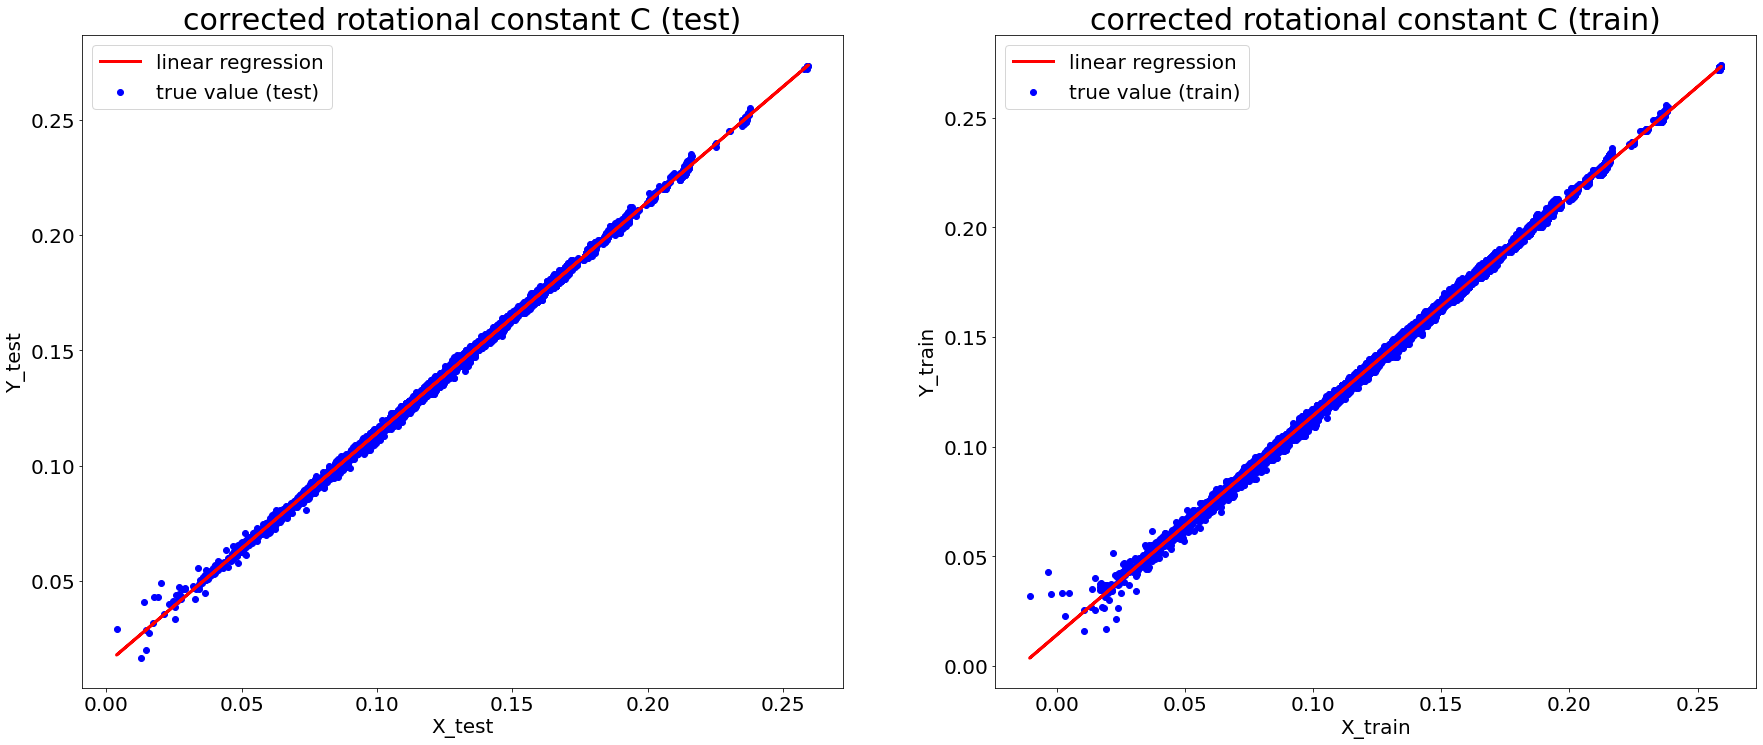

In [18]:
from sklearn.linear_model import LinearRegression

######## Remove the Biased data in rotational constant A ########
#XX=X.drop([0,1,2,5,6,7,8,9,10,11,25,26,27,28,36,112,114,115,116,483,489,490,504,2641,2642,14561,14581,14582,14632,52463,52464])
#YY=Y.drop([0,1,2,5,6,7,8,9,10,11,25,26,27,28,36,112,114,115,116,483,489,490,504,2641,2642,14561,14581,14582,14632,52463,52464])
######## Remove the Biased data in rotational constant B ########
#XX=X.drop([0,1,2,3,4,5,6,7,10,11,15,16,19,46,47,171,172,173,175,176])
#YY=Y.drop([0,1,2,3,4,5,6,7,10,11,15,16,19,46,47,171,172,173,175,176])
######## Remove the Biased data in rotational constant C ########
#XX=X.drop([0,1,2,3,4,5,6,7,15,16])
#YY=Y.drop([0,1,2,3,4,5,6,7,15,16])
XX=X
YY=Y

# setting the training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(XX,YY, test_size=0.2, random_state=42)

# using linear regression model
Linear_Reg=LinearRegression()
Linear_Reg.fit(X_train, Y_train)
Y_pred=Linear_Reg.predict(X_test)
Y_pret=Linear_Reg.predict(X_train)
# save the R2, MSE and MAE for testing set
result[0,0]=r2_score(Y_test,Y_pred)
result[1,0]=mean_squared_error(Y_test,Y_pred)
result[2,0]=mean_absolute_error(Y_test,Y_pred)
# save the R2, MSE and MAE for training set
result[3,0]=r2_score(Y_train,Y_pret)
result[4,0]=mean_squared_error(Y_train,Y_pret)
result[5,0]=mean_absolute_error(Y_train,Y_pret)
#print(Linear_Reg.coef_)

plt.rcParams["figure.figsize"] = (30,12)
X_tests=(X_test.dot(np.transpose(Linear_Reg.coef_)))

# plot the fitting result for linear regresion model - testing set
plt.subplot(1,2,1)
plt.title("corrected rotational constant C (test)",fontsize = 30)
plt.scatter(X_tests,Y_test,color='b',label='true value (test)')
plt.plot(X_tests,Y_pred,color='r',linewidth=3,label='linear regression')
plt.legend(loc='upper left',fontsize=20) 
plt.xlabel('X_test',fontsize=20)
plt.ylabel('Y_test',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# plot the fitting result for linear regresion model - training set
X_trains=(X_train.dot(np.transpose(Linear_Reg.coef_)))
plt.subplot(1,2,2)
plt.title("corrected rotational constant C (train)",fontsize = 30)
plt.scatter(X_trains,Y_train,color='b',label='true value (train)')
plt.plot(X_trains,Y_pret,color='r',linewidth=3,label='linear regression')
plt.legend(loc='upper left',fontsize=20) 
plt.xlabel('X_train',fontsize=20)
plt.ylabel('Y_train',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [19]:
from sklearn.linear_model import Ridge
X_train, X_test, Y_train, Y_test = train_test_split(XX, YY, test_size=0.2, random_state=42)
Ridge_Reg=Ridge()
Ridge_Reg.fit(X_train, Y_train)
Y_pred=Ridge_Reg.predict(X_test)
Y_pret=Ridge_Reg.predict(X_train)
# save the R2, MSE and MAE for testing set
result[0,1]=r2_score(Y_test,Y_pred)
result[1,1]=mean_squared_error(Y_test,Y_pred)
result[2,1]=mean_absolute_error(Y_test,Y_pred)
# save the R2, MSE and MAE for training set
result[3,1]=r2_score(Y_train,Y_pret)
result[4,1]=mean_squared_error(Y_train,Y_pret)
result[5,1]=mean_absolute_error(Y_train,Y_pret)
#print(Ridge_Reg.coef_)

In [20]:
from sklearn.linear_model import Lasso
X_train, X_test, Y_train, Y_test = train_test_split(XX, YY, test_size=0.2, random_state=42)
Lasso_Reg=Lasso()
Lasso_Reg.fit(X_train, Y_train)
Y_pred=Lasso_Reg.predict(X_test)
Y_pret=Lasso_Reg.predict(X_train)
# save the R2, MSE and MAE for testing set
result[0,2]=r2_score(Y_test,Y_pred)
result[1,2]=mean_squared_error(Y_test,Y_pred)
result[2,0]=mean_absolute_error(Y_test,Y_pred)
# save the R2, MSE and MAE for training set
result[3,2]=r2_score(Y_train,Y_pret)
result[4,2]=mean_squared_error(Y_train,Y_pret)
result[5,2]=mean_absolute_error(Y_train,Y_pret)
#print(Lasso_Reg.coef_)

In [22]:
from sklearn.linear_model import ElasticNet
X_train, X_test, Y_train, Y_test = train_test_split(XX, YY, test_size=0.2, random_state=42)
ElasticNet_Reg=ElasticNet()
ElasticNet_Reg.fit(X_train, Y_train)
Y_pred=ElasticNet_Reg.predict(X_test)
Y_pret=ElasticNet_Reg.predict(X_train)
# save the R2, MSE and MAE for testing set
result[0,3]=r2_score(Y_test,Y_pred)
result[1,3]=mean_squared_error(Y_test,Y_pred)
result[2,3]=mean_absolute_error(Y_test,Y_pred)
# save the R2, MSE and MAE for training set
result[3,3]=r2_score(Y_train,Y_pret)
result[4,3]=mean_squared_error(Y_train,Y_pret)
result[5,3]=mean_absolute_error(Y_train,Y_pret)
#print(ElasticNet_Reg.coef_)

In [23]:
from sklearn.linear_model import BayesianRidge
X_train, X_test, Y_train, Y_test = train_test_split(XX, YY, test_size=0.2, random_state=42)
BayesianRidge_Reg=BayesianRidge()
BayesianRidge_Reg.fit(X_train, Y_train.values.ravel())
Y_pred=BayesianRidge_Reg.predict(X_test)
Y_pret=BayesianRidge_Reg.predict(X_train)
# save the R2, MSE and MAE for testing set
result[0,4]=r2_score(Y_test,Y_pred)
result[1,4]=mean_squared_error(Y_test,Y_pred)
result[2,4]=mean_absolute_error(Y_test,Y_pred)
# save the R2, MSE and MAE for training set
result[3,4]=r2_score(Y_train,Y_pret)
result[4,4]=mean_squared_error(Y_train,Y_pret)
result[5,4]=mean_absolute_error(Y_train,Y_pret)
#print(BayesianRidge_Reg.coef_)

In [24]:
from sklearn.ensemble import BaggingRegressor
X_train, X_test, Y_train, Y_test = train_test_split(XX, YY, test_size=0.2, random_state=42)
regr = BaggingRegressor()
regr.fit(X_train, Y_train.values.ravel())
Y_pred=regr.predict(X_test)
Y_pret=regr.predict(X_train)
# save the R2, MSE and MAE for testing set
result[0,5]=r2_score(Y_test,Y_pred)
result[1,5]=mean_squared_error(Y_test,Y_pred)
result[2,5]=mean_absolute_error(Y_test,Y_pred)
# save the R2, MSE and MAE for training set
result[3,5]=r2_score(Y_train,Y_pret)
result[4,5]=mean_squared_error(Y_train,Y_pret)
result[5,5]=mean_absolute_error(Y_train,Y_pret)

In [25]:
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, Y_train, Y_test = train_test_split(XX, YY, test_size=0.2, random_state=42)
DTR = DecisionTreeRegressor(max_depth=6)
DTR.fit(X_train, Y_train.values.ravel())
Y_pred=DTR.predict(X_test)
Y_pret=DTR.predict(X_train)
# save the R2, MSE and MAE for testing set
result[0,6]=r2_score(Y_test,Y_pred)
result[1,6]=mean_squared_error(Y_test,Y_pred)
result[2,6]=mean_absolute_error(Y_test,Y_pred)
# save the R2, MSE and MAE for training set
result[3,6]=r2_score(Y_train,Y_pret)
result[4,6]=mean_squared_error(Y_train,Y_pret)
result[5,6]=mean_absolute_error(Y_train,Y_pret)
#print(DTR.feature_importances_)

In [26]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, Y_train, Y_test = train_test_split(XX, YY, test_size=0.2, random_state=42)
RFR = RandomForestRegressor(max_depth=6)
RFR.fit(X_train, Y_train.values.ravel())
Y_pred=RFR.predict(X_test)
Y_pret=RFR.predict(X_train)
# save the R2, MSE and MAE for testing set
result[0,7]=r2_score(Y_test,Y_pred)
result[1,7]=mean_squared_error(Y_test,Y_pred)
result[2,7]=mean_absolute_error(Y_test,Y_pred)
# save the R2, MSE and MAE for training set
result[3,7]=r2_score(Y_train,Y_pret)
result[4,7]=mean_squared_error(Y_train,Y_pret)
result[5,7]=mean_absolute_error(Y_train,Y_pret)
#print(RFR.feature_importances_)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [27]:
from sklearn.ensemble import AdaBoostRegressor
X_train, X_test, Y_train, Y_test = train_test_split(XX, YY, test_size=0.2, random_state=42)
ABR = AdaBoostRegressor()
ABR.fit(X_train, Y_train.values.ravel())
Y_pred=ABR.predict(X_test)
Y_pret=ABR.predict(X_train)
# save the R2, MSE and MAE for testing set
result[0,8]=r2_score(Y_test,Y_pred)
result[1,8]=mean_squared_error(Y_test,Y_pred)
result[2,8]=mean_absolute_error(Y_test,Y_pred)
# save the R2, MSE and MAE for training set
result[3,8]=r2_score(Y_train,Y_pret)
result[4,8]=mean_squared_error(Y_train,Y_pret)
result[5,8]=mean_absolute_error(Y_train,Y_pret)
#print(ABR.feature_importances_)

In [28]:
from sklearn.ensemble import GradientBoostingRegressor
X_train, X_test, Y_train, Y_test = train_test_split(XX, YY, test_size=0.2, random_state=42)
GBR = GradientBoostingRegressor()
GBR.fit(X_train, Y_train.values.ravel())
Y_pred=GBR.predict(X_test)
Y_pret=GBR.predict(X_train)
# save the R2, MSE and MAE for testing set
result[0,9]=r2_score(Y_test,Y_pred)
result[1,9]=mean_squared_error(Y_test,Y_pred)
result[2,9]=mean_absolute_error(Y_test,Y_pred)
# save the R2, MSE and MAE for training set
result[3,9]=r2_score(Y_train,Y_pret)
result[4,9]=mean_squared_error(Y_train,Y_pret)
result[5,9]=mean_absolute_error(Y_train,Y_pret)
#print(GBR.feature_importances_)

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
X_train, X_test, Y_train, Y_test = train_test_split(XX, YY, test_size=0.2, random_state=42)
ABDT = AdaBoostRegressor(DecisionTreeRegressor(max_depth=6))
ABDT.fit(X_train, Y_train.values.ravel())
Y_pred=ABDT.predict(X_test)
Y_pret=ABDT.predict(X_train)
# save the R2, MSE and MAE for testing set
result[0,10]=r2_score(Y_test,Y_pred)
result[1,10]=mean_squared_error(Y_test,Y_pred)
result[2,10]=mean_absolute_error(Y_test,Y_pred)
# save the R2, MSE and MAE for training set
result[3,10]=r2_score(Y_train,Y_pret)
result[4,10]=mean_squared_error(Y_train,Y_pret)
result[5,10]=mean_absolute_error(Y_train,Y_pret)
#print(ABDT.feature_importances_)

In [30]:
from sklearn.ensemble import ExtraTreesRegressor 
X_train, X_test, Y_train, Y_test = train_test_split(XX, YY, test_size=0.2, random_state=42)
ET = ExtraTreesRegressor(max_depth=6)
ET.fit(X_train, Y_train.values.ravel())
Y_pred=ET.predict(X_test)
Y_pret=ET.predict(X_train)
result[0,11]=r2_score(Y_test,Y_pred)
result[1,11]=mean_squared_error(Y_test,Y_pred)
result[2,11]=mean_absolute_error(Y_test,Y_pred)
# save the R2, MSE and MAE for training set
result[3,11]=r2_score(Y_train,Y_pret)
result[4,11]=mean_squared_error(Y_train,Y_pret)
result[5,11]=mean_absolute_error(Y_train,Y_pret)
#print(ET.feature_importances_)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [37]:
model=['linear regression','riddge regression','LASSO regression','elastic net regression',
        'Bayesian regression','bagging','decison tree','random forest','adaboost',
       'gradient boost','adaboost decison tree','extra tree']
MODEL=pd.DataFrame(model)
RESULT=pd.DataFrame(result.T,columns=['R2(testing','MSE(testing)','MAE(testing)',
                                      'R2(training)','MSE(training)','MAE(training)'])
ALL=pd.concat([MODEL,RESULT],axis=1)
ALL

,0,R2(testing,MSE(testing),MAE(testing),R2(training),MSE(training),MAE(training)
0,linear regression,9.990851e-01,1.014049e-06,0.026469,0.999086,1.011473e-06,0.000775
1,riddge regression,9.990852e-01,1.013982e-06,0.000776,0.999086,1.011650e-06,0.000775
2,LASSO regression,-5.593444e-07,1.108385e-03,0.000000,0.000000,1.106939e-03,0.026452
3,elastic net regression,-5.593444e-07,1.108385e-03,0.026469,0.000000,1.106939e-03,0.026452
4,Bayesian regression,9.990851e-01,1.014010e-06,0.000776,0.999086,1.011481e-06,0.000775
5,bagging,9.992723e-01,8.066210e-07,0.000648,0.999845,1.714517e-07,0.000290
6,decison tree,9.934660e-01,7.242128e-06,0.001781,0.994270,6.342797e-06,0.001768
7,random forest,9.946518e-01,5.927913e-06,0.001699,0.994829,5.723772e-06,0.001690
8,adaboost,9.833592e-01,1.844435e-05,0.003488,0.983480,1.828715e-05,0.003485
9,gradient boost,9.976051e-01,2.654427e-06,0.001141,0.997842,2.388299e-06,0.001128
